Nhóm 4:

Nguyễn Anh Tuấn - K214110827

Nguyễn Ngọc Phương Uyên - K214111322

Nguyễn Hồng Ngọc Ánh - K214110786

Trần Anh Tâm - K214111952

Nguyễn Thảo Nguyên - K214110812

#1. TIỀN XỬ LÝ - PRE-PROCESSING



Để thực hiện tiền xử lý cho bộ dữ liệu, trước tiên nhóm tiến hành import các thư viện liên quan để sử dụng, trong đó bao gồm:
*   Pandas - thư viện được sử dụng để xử lý và phân tích dữ liệu
*   emot - hỗ trợ việc xử lý cảm xúc trong văn bản bằng cách nhận diện và thay thế các biểu cảm cảm xúc (emoji) trong văn bản thành các biểu tượng chữ thường
*   py_vncorenlp - là một thư viện cung cấp các chức năng như phân đoạn từ, gán nhãn từ loại, và nhận dạng thực thể trong văn bản tiếng Việt
*   pickle - là một cách để lưu trữ và truy xuất các đối tượng Python dưới dạng biểu diễn nhị phân
*   regex - là thư viện hỗ trợ việc thực hiện các thao tác xử lý chuỗi sử dụng biểu thức hcính quy (regular expressions)
*   underthesea - là thư viện xử lý ngôn ngữ tự nhiên cho tiếng Việt
*   ftfy - Ftfy (fix text for you) là một thư viện giúp sửa các vấn đề liên quan đến mã hóa và giải mã văn bản, đảm bảo rằng văn bản được hiển thị một cách chính xác
*   unicodedata - cung cấp các hàm để thực hiện các phép toán trên ký tự Unicode
   


In [ ]:
import emot
emot_obj = emot.core.emot()

In [ ]:
import py_vncorenlp

py_vncorenlp.download_model(save_dir='/content')
rdrsegmenter = py_vncorenlp.VnCoreNLP(annotators=["wseg"], save_dir='/content')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from os import path

root_path = '/content/gdrive/Shareddrives/PTDL WEB/Bài tập + Đồ án/Đồ án/Code_Crawl_Data_Shoppe'
dataset_path = path.join(root_path, 'dataset')
raw_path = path.join(dataset_path, 'raw')
preprocessing_path = path.join(dataset_path, 'preprocessing')

!ls "$root_path"
!ls "$dataset_path"
!ls "$raw_path"

 dataset   documentation   fix.gdoc  'slangs update.gdoc'  'slangs update.txt'	 src
annotated  preprocessing  raw  review_1.xlsx  val_annotater
electric.p  fashion.p


In [ ]:
import pickle as pkl

with open(path.join(raw_path, 'fashion.p'), 'rb') as f:
  fashion_data = pkl.load(f)

In [ ]:
fashion_data[0].keys()

dict_keys(['itemid', 'shopid', 'name', 'currency', 'price', 'price_before_discount', 'raw_discount', 'item_rating', 'comment', 'item_rating_summary'])

In [ ]:
fashion_data[0]['comment'][0].keys()

dict_keys(['cmtid', 'comment', 'rating_star'])

In [ ]:
data_df = {
    'cmtid': [],
    'itemid': [],
    'name': [],
    'comment': [],
    'rating_star': []
}

for product in fashion_data:
  for cmt in product['comment']:

    data_df['cmtid'].append(int(cmt['cmtid']))
    data_df['itemid'].append(int(product['itemid']))

    data_df['comment'].append(cmt['comment'])
    data_df['rating_star'].append(cmt['rating_star'])

    data_df['name'].append(product['name'])


import pandas as pd

data_df = pd.DataFrame.from_dict(data_df)
data_df

,cmtid,itemid,name,comment,rating_star
0,13239687733,23886482112,Áo len cardigan trơn dáng rộng AO26,mặc khá mát vải này cũng ổn đẹp tuyệt với cho ...,5
1,13239626315,23886482112,Áo len cardigan trơn dáng rộng AO26,hàng giao nhanhh chất lươngg sản phẩm tuyệt vo...,5
2,13239565011,23886482112,Áo len cardigan trơn dáng rộng AO26,"Sp rất đẹp ,thơm, shop giao siêu nhanh, chất v...",5
3,13175587025,18894188708,"Áo Khoác Thom , Áo Khoác Lông Cừu 4 Sọc Cánh T...",Màu sắc:ko\nChất liệu:ko cos\nĐúng với mô tả:k...,1
4,13253091864,18894188708,"Áo Khoác Thom , Áo Khoác Lông Cừu 4 Sọc Cánh T...",Màu sắc:đen\nĐúng với mô tả:cũng OK\nChất liệu...,1
...,...,...,...,...,...
18388,13239421063,22386234995,"N07 Sét Nhung QC Phối Viền, Sét Bộ Ngủ Cho Nữ ...","Xinh phết. Chất nhung mềm. Đường may, cúc khá ...",5
18389,13239621971,22386234995,"N07 Sét Nhung QC Phối Viền, Sét Bộ Ngủ Cho Nữ ...",M63 45kg mặc sz L vừa chiều dài nha. Hàng đẹp ...,5
18390,13240092618,22386234995,"N07 Sét Nhung QC Phối Viền, Sét Bộ Ngủ Cho Nữ ...","""Chất liệu như mô tả\nNhìn đẹp, sang nên mua đ...",5
18391,13339211202,22386234995,"N07 Sét Nhung QC Phối Viền, Sét Bộ Ngủ Cho Nữ ...",Màu sắc:đen\nĐúng với mô tả:đúng\nChất liệu:nh...,5


Mỗi dòng trong bộ dữ liệu này liên kết với một sản phẩm cụ thể. Cột itemid chứa mã sản phẩm mà dòng đánh giá liên quan đến. Cột name chứa tên của sản phẩm đó. Đồng thời, mỗi dòng trong bộ dữ liệu này cũng chứa một đánh giá cụ thể về sản phẩm. Cột comment chứa nội dung đánh giá đó.

Trong đó:
- cmtid: Mã đánh giá là một số duy nhất được Shopee gán cho mỗi đánh giá. Mã này được sử dụng để tham chiếu đến đánh giá trong các hệ thống của Shopee.

- itemid: Mã sản phẩm là một số duy nhất được Shopee gán cho mỗi sản phẩm. Mã này được sử dụng để tham chiếu đến sản phẩm trong các hệ thống của Shopee.

- name: Tên sản phẩm là tên của sản phẩm được đánh giá. Tên này được cung cấp bởi người bán sản phẩm.

- comment: Nội dung đánh giá là văn bản được người mua viết để đánh giá sản phẩm. Nội dung đánh giá có thể bao gồm các thông tin như chất lượng sản phẩm, dịch vụ khách hàng, thời gian giao hàng,...

- rating_star: Mức độ đánh giá chất lượng sản phẩm của người mua, được đánh giá từ 1 sao đến 5 sao.


In [ ]:
# @title data_df -> drop dup -> drop empty -> clean_df
dup_df = data_df.drop_duplicates(subset = ['comment'])
clean_df = dup_df.drop(dup_df[dup_df['comment'] == ''].index)

print("DUPLICATE :", len(data_df) - len(data_df.drop_duplicates(subset = ['comment'])))
print("EMPTY     :", len(data_df) - len(data_df.drop(data_df[data_df['comment'] == ''].index)))
print("FINAL     :", len(data_df) - len(clean_df))

clean_df = clean_df.reset_index(drop = True)
clean_df

DUPLICATE : 4088
EMPTY     : 3356
FINAL     : 4089


,cmtid,itemid,name,comment,rating_star
0,13239687733,23886482112,Áo len cardigan trơn dáng rộng AO26,mặc khá mát vải này cũng ổn đẹp tuyệt với cho ...,5
1,13239626315,23886482112,Áo len cardigan trơn dáng rộng AO26,hàng giao nhanhh chất lươngg sản phẩm tuyệt vo...,5
2,13239565011,23886482112,Áo len cardigan trơn dáng rộng AO26,"Sp rất đẹp ,thơm, shop giao siêu nhanh, chất v...",5
3,13175587025,18894188708,"Áo Khoác Thom , Áo Khoác Lông Cừu 4 Sọc Cánh T...",Màu sắc:ko\nChất liệu:ko cos\nĐúng với mô tả:k...,1
4,13253091864,18894188708,"Áo Khoác Thom , Áo Khoác Lông Cừu 4 Sọc Cánh T...",Màu sắc:đen\nĐúng với mô tả:cũng OK\nChất liệu...,1
...,...,...,...,...,...
14299,12768980268,22648063543,Quần kaki túi hộp nữ form suông rộng MIAA lưng...,"Trời ơi quần đẹp xỉu tụi bây ơi, thề mua được ...",5
14300,13249750307,22648063543,Quần kaki túi hộp nữ form suông rộng MIAA lưng...,"Quần vải đẹp, màu xinh lắm, form quần ưng nha,...",5
14301,13239621971,22386234995,"N07 Sét Nhung QC Phối Viền, Sét Bộ Ngủ Cho Nữ ...",M63 45kg mặc sz L vừa chiều dài nha. Hàng đẹp ...,5
14302,13240092618,22386234995,"N07 Sét Nhung QC Phối Viền, Sét Bộ Ngủ Cho Nữ ...","""Chất liệu như mô tả\nNhìn đẹp, sang nên mua đ...",5


Sau khi quan sát nhóm nhận thấy có những comment bị lặp lại hoặc những comment bị rỗng nên sẽ thực hiện xoá những dòng dữ liệu này:

1. dup_df = data_df.drop_duplicates(subset=['comment']): Loại bỏ các dòng trùng lặp dựa trên cột 'comment'. Kết quả là dup_df sẽ là một DataFrame mới không chứa các bình luận trùng lặp.

2. clean_df = dup_df.drop(dup_df[dup_df['comment'] == ''].index): Loại bỏ các dòng có giá trị rỗng trong cột 'comment'. Nếu một dòng có 'comment' rỗng, nó sẽ được loại bỏ khỏi DataFrame dup_df. Kết quả là clean_df là DataFrame cuối cùng sau khi loại bỏ các bình luận trùng lặp và các bình luận rỗng.

3. clean_df = clean_df.reset_index(drop=True): Reset index của DataFrame clean_df để có index liên tục từ 0 đến len(clean_df) - 1.

Do comment bị rỗng và các comment bị lặp bị overlap nên cần phải xử lý cả hai trường hợp này để làm sạch dữ liệu tốt nhất.

**Tổng số các dòng bị loại bỏ vì bị trùng lặp và bị rỗng là 4088 dòng, do đó bộ dữ liẹu còn lại 14304 dòng.**


In [ ]:
tests = clean_df['comment'][:100].values.tolist()
tests

['mặc khá mát vải này cũng ổn đẹp tuyệt với cho 10 điêm',
 'hàng giao nhanhh chất lươngg sản phẩm tuyệt voiii nen mua nhaa',
 'Sp rất đẹp ,thơm, shop giao siêu nhanh, chất vải xịn dã man',
 'Màu sắc:ko\nChất liệu:ko cos\nĐúng với mô tả:ko\n\nChất lượng sản phẩm kém \nK\nNhu cầu mua lại không bao giờ\nĐộ lừa đảo quá cao nhé mng',
 'Màu sắc:đen\nĐúng với mô tả:cũng OK\nChất liệu:chưa thấy\n\nVì rẻ lên đánh giá 5* vì kg ở nhà nhưng vẫn cảm ơn shop 45k. Có Đức quá',
 'Đúng với mô tả:mua ao giao. Cái khác\n\nNhắn tin shop k tl \nTệ\nShop k uy tín',
 'Đúng với mô tả:không đúng\n\nĐặt áo lông giao quần trẻ con :)) đã thế quần còn bẩn và cũ',
 'Đúng với mô tả:không\nChất liệu:không đúng với đơn hàng đã đặt\nMàu sắc:trắng nâu đen\n\nRõ ràng đặt 1 lần 5 áo nhưng giao về chỉ có 1 áo\nĐã vậy còn sai mẫu không giống với mẫu mình đặt \nYêu cầu trả hàng\nBao giờ hoàn trả thành công thì mình sẽ đánh giá lại 5 sao',
 'Màu sắc:sai hàng\nĐúng với mô tả:sai hàng\nChất liệu:sai hàng\n\nShop làm ăn kiểu đé*

In [ ]:
!git clone https://github.com/v-nhandt21/Vinorm.git
!ls

Cloning into 'Vinorm'...
remote: Enumerating objects: 125, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 125 (delta 4), reused 3 (delta 3), pack-reused 120
Receiving objects: 100% (125/125), 202.66 MiB | 32.45 MiB/s, done.
Resolving deltas: 100% (32/32), done.
Updating files: 100% (128/128), done.
gdrive	models	sample_data  Vinorm  VnCoreNLP-1.2.jar


In [ ]:
import os

slangs_dict = {}
for file in os.listdir('Vinorm/vinorm/Mapping'):
  if file not in ['Teencode.txt', 'Number.txt']:
    continue

  print(file, ':', end = ' ')
  file_path = 'Vinorm/vinorm/Mapping/' + file

  with open(file_path, 'r', encoding = 'utf8') as f:
    data_slangs = f.readlines()
    print(len(data_slangs))

    for i in data_slangs:
      i = i.replace("\n", "").lower().strip()
      i = i.split("#")

      for punc in ['(', ')', '.', '+', '*']:
        i[0] = i[0].replace(punc, '\\' + punc)

      slangs_dict[i[0]] = i[1]

slangs_dict.update({
    'sp': 'sản phẩm',
    'tl': 'trả lời',
    'mn': 'mọi người',
    'mng': 'mọi người',
    'mngf': 'mọi người',
    'h': 'giờ',
    'v': 'vậy',
    'cgi': 'cái gì',
    'vs': 'với',
    'sv': 'sinh viên',
    'sop': 'shop',
    'lmj': 'làm gì',
    'e': 'em',
    'dc': 'được',
    'nx': 'nữa',
    'kg': 'không',
    'bt': 'biết',
    'l': 'làm',
    'ntin': 'nhắn tin',
    'j': 'gì',
    'v': 'vậy',
    'lm': 'làm',
    't': 'tao',
    's': 'sao',
    'ngta': 'người ta',
    'z': 'vậy',
    'nt': 'nhắn tin',
    'ib': 'inbox',
    'lh': 'liên hệ',
    'kh': 'không'
})

len(slangs_dict)

Number.txt : 10
Teencode.txt : 484


521

Nhóm cập nhật thêm các từ đặc biệt vào từ điển slangs_dict của vinorm, đây là từ điển chứa những từ viết tắt và teencode để sử dụng cho việc thay thế những từ ngữ viết tắt và teencode này chuyển thành từ ngữ chuẩn. Bên cạnh đó, khi thực hiện gán dữ liệu nhóm có thực hiện lưu lại những từ ngữ viết tắt khác và cập nhật vào từ điển slangs_dict bằng cách update từ điển này thường xuyên.

**Sau khi thực hiện nhóm thu được một từ điển từ ngữ viết tắt và teencode gồm : 521 từ**



In [ ]:
import regex as re

with open(path.join(root_path, 'slangs update.txt'), 'r', encoding = 'utf8') as f:
  data = f.readlines()
  data = [re.sub(r'[,‘’\';]', '', i).lower() for i in data]
  data = [i.replace('\n', '').replace('\ufeff', '') for i in data]
  new_slang = {}

  for i in data:
    j = i.split(":")
    new_slang[j[0].strip()] = j[1].strip()
slangs_dict.update(new_slang)
len(slangs_dict)

606

Nhóm thực hiện việc cập nhật từ điển slangs_dict bằng cách đọc dữ liệu từ một tệp tin văn bản 'slangs update.txt' và thêm vào các ánh xạ mới.

**Từ điển về từ ngữ viết tắt và teencode cuối cùng của nhóm là 606 từ**

In [ ]:
VIETNAMESE_TEXT = 'àáãạảăắằẳẵặâấầẩẫậèéẹẻẽêềếểễệđìíĩỉịòóõọỏôốồổỗộơớờởỡợùúũụủưứừửữựỳỵỷỹýÀÁÃẠẢĂẮẰẲẴẶÂẤẦẨẪẬÈÉẸẺẼÊỀẾỂỄỆĐÌÍĨỈỊÒÓÕỌỎÔỐỒỔỖỘƠỚỜỞỠỢÙÚŨỤỦƯỨỪỬỮỰỲỴỶỸ'
LATIN_VI = r'[A-Za-z' + VIETNAMESE_TEXT + r']'

regex_dict = {
    r'(?<=\d+\s)k\b': 'nghìn',
    r'(?<=\d+\s)m(?=\s\d+)\b': 'mét',
    r'(?<=\d+\s)kg\b': 'kilogram',
    r'(?<=size\s)s\b': 'nhỏ',
    r'(?<=size\s)m\b': 'trung bình',
    r'(?<=size\s)l\b': 'lớn',
    r'(?<=size\s)xl\b': 'rất lớn',
    r'(?<=size\s)xxl\b': 'rất rất lớn',
}

Do tính chất đặc biệt của ngành hàng Thời trang, các comment có thể chứa thông tin về kích thước, chiều cao, cân nặng của khách hàng dưới dạng viết tắt như S, M, L. Đế trách việc chuyển đổi từ viết tắt bị sai, nhóm tiếng hành xây dụng từ điển cho các nhóm từ này.

Nhóm sử dụng hàm demoji để chuyển đổi emoji và emoticon thành văn bản. Và sử dụng hàm pre_processing để tiền xử lý nội dung của comment bao gồm:
- Chuyển đổi toàn bộ văn bản thành chữ thường
- Chuẩn hóa unicode để đảm bảo rằng các ký tự được biểu diễn theo một cách duy nhất
- Thay thế ký tự xuống dòng bằng khoảng trắng
- Loại bỏ khoảng trắng thừa
- Sửa các lỗi chính tả và biểu hiện văn bản.
- Chuẩn hóa văn bản sử dụng underthesea
- Loại bỏ dấu câu và các ký tự đặc biệt khác
- Sửa các từ viết tắt bằng cách thay thế chúng theo từ điển slangs_dict
- Sử dụng py_vncorenlp để tách từ

Cuối cùng hàm sẽ trả về văn bản đã được xử lý.

In [ ]:
import underthesea as u
import ftfy
import string
import unicodedata

def demoji(text):

  text = text.strip()
  text = ' ' + text + ' '

  emojis = emot_obj.emoji(text)
  emoticons = emot_obj.emoticons(text)
  for k, v in zip(emojis['value'] + emoticons['value'], emojis['mean'] + emoticons['mean']):

    for punc in ['(', ')', '.', '+', '*']:
      k = k.replace(punc, '\\' + punc)

    v = v.replace(':', '')
    v = '<emoji>' + v + '</emoji>'

    pattern = r'\s' + k + r'\s'
    text = re.sub(pattern, ' ' + v + ' ', text)

  text = text.lower()
  text = text.strip()

  return text

def pre_processing(text):

  text = text.lower()
  text = unicodedata.normalize('NFC', text)

  # Clean space
  text = text.replace("\n", " ")
  text = re.sub(r'\s+', ' ', text)

  # Fix encoding, punc
  text = text.strip()
  text = ftfy.fix_encoding(text)
  text = ftfy.fix_text(text)
  text = u.text_normalize(text)

  # Turn emoji, emoticon to text
  text = demoji(text)

  # Fix dup punc
  text = re.sub(r'([!"#$%&\'()*+,\-\.\/:;<=>?@[\\\]^_`{|}~])(?:\s*\1)+', r' \1 ', text)
  text = re.sub(r'\s+', ' ', text)

  # Remove punc
  text = re.sub(r'[!"#$%&\'()*+,\-\.:;=?@[\\\]^_`{|}~]', ' ', text)
  text = re.sub(r'<(?!\/?[^\s]+>)|(?<!<\/?[^\s]+)>|(?<!<)\/(?![^\s]+>)', ' ', text)
  text = re.sub(r'\s+', ' ', text)

  # Normalize with regex
  text = re.sub(r'((?<!' + LATIN_VI + r'\s?)' + LATIN_VI + r'{1,3}(?!' + LATIN_VI + r'\s?))', r' \1 ', text)
  text = text.strip()
  text = re.sub(r'\s+', ' ', text)
  for pattern, value in regex_dict.items():
    text = re.sub(pattern, value, text)

  # Fix slang
  text = " ".join([slangs_dict.get(word, word) for word in text.split()])

  # Word segment
  try:
    text = rdrsegmenter.word_segment(text)[0]
  except:
    pass

  # Fix token
  text = re.sub(r'<\s?(\/)?\s([^\s]+)\s>', r'<\1\2>', text)

  text = re.sub(r'\s+', ' ', text)
  return text.strip()

for test in tests:
  print(pre_processing(test))
  print()

print("=" * 50)


mặc khá mát vải này cũng ổn đẹp tuyệt với cho 10 điêm

hàng giao nhanhh chất lươngg sản_phẩm tuyệt voiii nen mua nhaa

sản_phẩm rất đẹp thơm shop giao siêu nhanh chất vải xịn dã_man

màu_sắc không chất_liệu không cos đúng với mô_tả không chất_lượng sản_phẩm kém không nhu_cầu mua lại không bao_giờ độ lừa_đảo quá cao nhé mọi người

màu sắc đen đúng với mô_tả cũng ok chất_liệu chưa thấy vì rẻ lên đánh_giá năm vì không ở nhà nhưng vẫn cảm_ơn shop 45 nghìn có đức quá

đúng với mô_tả mua ao giao cái khác nhắn_tin shop không trả_lời tệ shop không uy_tín

đúng với mô_tả không đúng đặt áo lông giao quần trẻ_con <emoji> very happy face or smiley </emoji> đã thế quần còn bẩn và cũ

đúng với mô_tả không chất_liệu không đúng với đơn hàng đã đặt màu_sắc trắng nâu đen rõ_ràng đặt một lần năm áo nhưng giao về chỉ có một áo đã vậy còn sai mẫu không giống với mẫu mình đặt yêu_cầu trả hàng bao_giờ hoàn_trả thành_công thì mình sẽ đánh_giá lại năm sao

màu_sắc sai hàng đúng với mô_tả sai hàng chất_liệu sai

In [ ]:
clean_df['clean_cmt'] = clean_df['comment'].apply(pre_processing)
clean_df = clean_df.drop(clean_df[clean_df['clean_cmt'] == ''].index)
clean_df = clean_df.reset_index(drop = True)

In [ ]:
clean_df

,cmtid,itemid,name,comment,rating_star,clean_cmt
0,13239687733,23886482112,Áo len cardigan trơn dáng rộng AO26,mặc khá mát vải này cũng ổn đẹp tuyệt với cho ...,5,mặc khá mát vải này cũng ổn đẹp tuyệt với cho ...
1,13239626315,23886482112,Áo len cardigan trơn dáng rộng AO26,hàng giao nhanhh chất lươngg sản phẩm tuyệt vo...,5,hàng giao nhanhh chất lươngg sản_phẩm tuyệt vo...
2,13239565011,23886482112,Áo len cardigan trơn dáng rộng AO26,"Sp rất đẹp ,thơm, shop giao siêu nhanh, chất v...",5,sản_phẩm rất đẹp thơm shop giao siêu nhanh chấ...
3,13175587025,18894188708,"Áo Khoác Thom , Áo Khoác Lông Cừu 4 Sọc Cánh T...",Màu sắc:ko\nChất liệu:ko cos\nĐúng với mô tả:k...,1,màu_sắc không chất_liệu không cos đúng với mô_...
4,13253091864,18894188708,"Áo Khoác Thom , Áo Khoác Lông Cừu 4 Sọc Cánh T...",Màu sắc:đen\nĐúng với mô tả:cũng OK\nChất liệu...,1,màu sắc đen đúng với mô_tả cũng ok chất_liệu c...
...,...,...,...,...,...,...
14298,12768980268,22648063543,Quần kaki túi hộp nữ form suông rộng MIAA lưng...,"Trời ơi quần đẹp xỉu tụi bây ơi, thề mua được ...",5,trời_ơi quần đẹp xỉu tụi bây ơi thề mua được c...
14299,13249750307,22648063543,Quần kaki túi hộp nữ form suông rộng MIAA lưng...,"Quần vải đẹp, màu xinh lắm, form quần ưng nha,...",5,quần vải đẹp màu xinh lắm form quần ưng nha gi...
14300,13239621971,22386234995,"N07 Sét Nhung QC Phối Viền, Sét Bộ Ngủ Cho Nữ ...",M63 45kg mặc sz L vừa chiều dài nha. Hàng đẹp ...,5,m 63 45 kilogram mặc size làm vừa chiều dài nh...
14301,13240092618,22386234995,"N07 Sét Nhung QC Phối Viền, Sét Bộ Ngủ Cho Nữ ...","""Chất liệu như mô tả\nNhìn đẹp, sang nên mua đ...",5,chất_liệu như mô_tả nhìn đẹp sang nên mua để m...


**Sau khi thực hiện pre-processing, nhóm thu được thêm 1 cột dữ liệu 'clean_cmt' để tiếp tục những bước sau**

In [ ]:
clean_df.to_csv(path.join(preprocessing_path, 'fashion_v2.csv'), index = False, header = True, encoding = 'utf8')

#2. KHAI PHÁ DỮ LIỆU - EDA

Để thực hiện EDA cho bộ dữ liệu, trước tiên nhóm tiến hành import các thư viện liên quan để sử dụng, trong đó bao gồm:
*   Pandas - thư viện được sử dụng để xử lý và phân tích dữ liệu
*   Matplotlib - thư viện vẽ đồ thị và biểu đồ
*   NumPy - thư viện cung cấp hỗ trợ cho việc làm việc với mảng đa chiều và ma trận
*   NLTK - thư viện xử lý ngôn ngữ tự nhiên
*   Seaborn - thư viện trực quan hóa dữ liệu dựa trên Matplotlib
*   Scikit-learn - thư viện học máy
*   Gensim - thư viện được sử dụng cho việc mô hình hóa chủ đề và phân tích độ tương đồng giữa các văn bản











In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
import seaborn as sns
import sklearn
import gensim

In [ ]:
comments= pd.read_csv('/content/gdrive/Shareddrives/PTDL WEB/Bài tập + Đồ án/Đồ án/Code_Crawl_Data_Shoppe/dataset/preprocessing/fashion_v2.csv')
comments.head(6)

,cmtid,itemid,name,comment,rating_star,clean_cmt
0,13239687733,23886482112,Áo len cardigan trơn dáng rộng AO26,mặc khá mát vải này cũng ổn đẹp tuyệt với cho ...,5,mặc khá mát vải này cũng ổn đẹp tuyệt với cho ...
1,13239626315,23886482112,Áo len cardigan trơn dáng rộng AO26,hàng giao nhanhh chất lươngg sản phẩm tuyệt vo...,5,hàng giao nhanhh chất lươngg sản_phẩm tuyệt vo...
2,13239565011,23886482112,Áo len cardigan trơn dáng rộng AO26,"Sp rất đẹp ,thơm, shop giao siêu nhanh, chất v...",5,sản_phẩm rất đẹp thơm shop giao siêu nhanh chấ...
3,13175587025,18894188708,"Áo Khoác Thom , Áo Khoác Lông Cừu 4 Sọc Cánh T...",Màu sắc:ko\nChất liệu:ko cos\nĐúng với mô tả:k...,1,màu_sắc không chất_liệu không cos đúng với mô_...
4,13253091864,18894188708,"Áo Khoác Thom , Áo Khoác Lông Cừu 4 Sọc Cánh T...",Màu sắc:đen\nĐúng với mô tả:cũng OK\nChất liệu...,1,màu sắc đen đúng với mô_tả cũng ok chất_liệu c...
5,13194946753,18894188708,"Áo Khoác Thom , Áo Khoác Lông Cừu 4 Sọc Cánh T...",Đúng với mô tả:mua ao giao. Cái khác\n\nNhắn t...,1,đúng với mô_tả mua ao giao cái khác nhắn_tin s...


In [ ]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14303 entries, 0 to 14302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cmtid             14303 non-null  int64  
 1   itemid            14303 non-null  int64  
 2   name              14303 non-null  object 
 3   comment           14303 non-null  object 
 4   rating_star       14303 non-null  int64  
 5   clean_cmt         14303 non-null  object 
 6   char_count        14303 non-null  int64  
 7   clean_cmt_tokens  14303 non-null  object 
 8   trigrams          14303 non-null  object 
 9   word_count        14303 non-null  int64  
 10  avg_word_length   14303 non-null  float64
dtypes: float64(1), int64(5), object(5)
memory usage: 1.2+ MB


Tại đây, chúng ta thấy được các thông tin cơ bản của các cột có trong dữ liệu, bao gồm 5 biến, không có giá trị missing value, cũng như là thấy được kiểu dữ liệu của các biến được sử dụng:
*   RangeIndex: 14303 entries, 0 to 14302: Đây là chỉ số của DataFrame, cho biết có tổng cộng 14303 dòng (entries) từ 0 đến 14303.
*   Data columns (total 6 columns): Đây là thông tin về các cột dữ liệu trong DataFrame, tổng cộng có 6 cột.
> Các cột dữ liệu được liệt kê dưới đây, bao gồm:
*   #: Cột dữ liệu chứa các giá trị chỉ số (index) của DataFrame.
*  name, comment, clean_cmt: Các cột dữ liệu có kiểu dữ liệu object, lưu trữ thông tin về tên sản phẩm, comment của sản phẩm chưa xử lý và comment đã qua tiền xử lý.
*   cmtid, itemid, rating_star: Các cột dữ liệu có kiểu dữ liệu int64, lưu trữ thông tin về id của comment, id của sản phẩm và rating của sản phẩm.
*   non-null Count: Đây là số lượng giá trị không rỗng (non-null) trong từng cột dữ liệu.
*   dtype: Đây là kiểu dữ liệu của từng cột, bao gồm int64 (số nguyên) và object (kiểu dữ liệu chung cho chuỗi, đối tượng, v.v.).

In [ ]:
comments['rating_star'].describe()

count    14303.000000
mean         3.583444
std          1.424906
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating_star, dtype: float64

Bảng trên cho biết cái nhìn tổng quan về phân phối và đặc điểm của các cột dữ liệu rating_star trong Dataframe


1    1974
2    1526
3    2317
4    3153
5    5333
Name: rating_star, dtype: int64


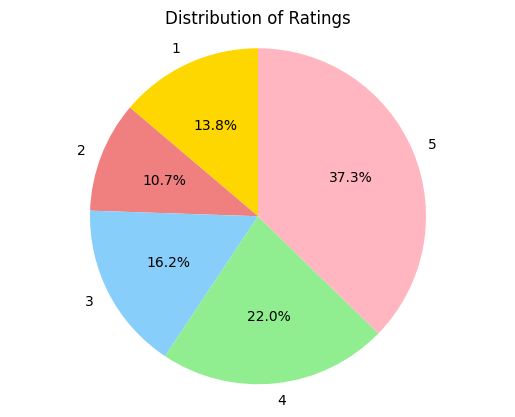

In [ ]:
# Đếm số lượng giá trị từ 1 đến 5 sao trong cột 'rating_star'
rating_counts = comments['rating_star'].value_counts().sort_index()

print(rating_counts)
# Vẽ biểu đồ
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90, colors=['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'lightpink'])
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.title('Distribution of Ratings')
plt.show()

Có thể thấy rằng số lượt đánh giá 5 sao chiếm số lượng lớn là 5333 lượt, đồng thời số lượt đánh giá từ 3 đến 5 sao chiếm phần lớn trong bộ dữ liệu với 75,5% và số lượt đánh giá 2 sao chiếm số lượng ít nhất với 10,7%.

In [ ]:
import re

# Hàm để loại bỏ emoji từ một chuỗi
def remove_emoji(text):
    # Sử dụng biểu thức chính quy để tìm và xóa emoji có định dạng <emoji> </emoji>
    emoji_pattern = re.compile(r'<emoji>(.*?)</emoji>')
    return emoji_pattern.sub(r'', text)

# Áp dụng hàm remove_emoji cho cột 'clean_cmt'
comments['clean_cmt'] = comments['clean_cmt'].apply(remove_emoji)

# In ra comment sau khi xoá emoji để kiểm tra
comments['clean_cmt'].head(10)
# for i in range(10):
#   print("Comment after removing emoji:", remove_emoji(comments['clean_cmt'][i]))

0    mặc khá mát vải này cũng ổn đẹp tuyệt với cho ...
1    hàng giao nhanhh chất lươngg sản_phẩm tuyệt vo...
2    sản_phẩm rất đẹp thơm shop giao siêu nhanh chấ...
3     không  không cos  không chất_lượng sản_phẩm k...
4    màu sắc đen  cũng ok  chưa thấy vì rẻ lên đánh...
5     mua ao giao cái khác nhắn_tin shop không trả_...
6     không đúng đặt áo lông giao quần trẻ_con  đã ...
7     không  không đúng với đơn hàng đã đặt  trắng ...
8     sai hàng  sai hàng  sai hàng shop làm_ăn kiểu...
9     không dung  sai  sai làm người có tâm tý đê l...
Name: clean_cmt, dtype: object


> Các comment trên Shopee thường sẽ có nhiều emoji, điều đó sẽ làm ảnh hưởng quá trình trực quan hoá dữ liệu và kết quả thu được, vì vậy nhóm tiến hành loại bỏ các emoji xuất hiện trong các comment



In [ ]:
comments['clean_cmt'] = comments['clean_cmt'].apply (lambda x: x.replace("màu sắc","" ))
comments['clean_cmt'] = comments['clean_cmt'].apply (lambda x: x.replace("đúng với mô_tả","" ))
comments['clean_cmt'] = comments['clean_cmt'].apply (lambda x: x.replace("chất_liệu","" ))
comments['clean_cmt'].head(10)

0    mặc khá mát vải này cũng ổn đẹp tuyệt với cho ...
1    hàng giao nhanhh chất lươngg sản_phẩm tuyệt vo...
2    sản_phẩm rất đẹp thơm shop giao siêu nhanh chấ...
3     không  không cos  không chất_lượng sản_phẩm k...
4     đen  cũng ok  chưa thấy vì rẻ lên đánh_giá nă...
5     mua ao giao cái khác nhắn_tin shop không trả_...
6     không đúng đặt áo lông giao quần trẻ_con  đã ...
7     không  không đúng với đơn hàng đã đặt  trắng ...
8     sai hàng  sai hàng  sai hàng shop làm_ăn kiểu...
9     không dung  sai  sai làm người có tâm tý đê l...
Name: clean_cmt, dtype: object



> Các bình luận của shopee thường sẽ mặc định các mục như là "đúng với mô tả", "màu sắc", "chất liệu" để khách hàng có thể đánh giá, tuy nhiên, các dữ liệu này có thể làm nhiễu quá trình trực quan hoá dữ liệu và nó không quá cần thiết, vì vậy nhóm sẽ tiến hành loại bỏ các dữ liệu này



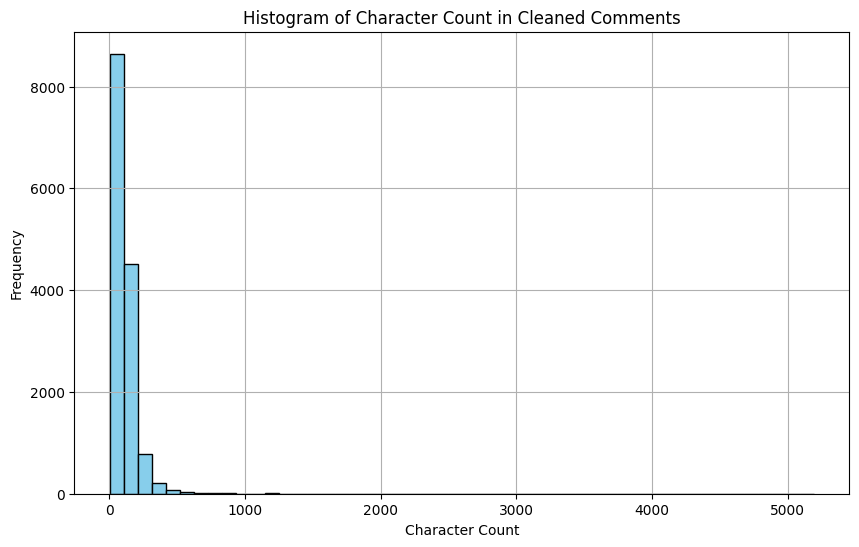

In [ ]:
comments['char_count'] = comments['clean_cmt'].apply(len)

# Vẽ biểu đồ histogram
plt.figure(figsize=(10, 6))
plt.hist(comments['char_count'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Character Count in Cleaned Comments')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



> Tiếp theo nhóm sẽ thực hiện việc tính độ dài ký tự của các bình luận sau khi đã được xử lý và sau đó vẽ biểu đồ histogram để hiển thị phân phối của số lượng ký tự trong các bình luận đã được làm sạch.


> Như chúng ta có thể thấy, độ dài của các bình luận phân bổ rơi vào khoảng 0-400 ký tự chiếm phần lớn






Word Count 0        13
1        11
2        12
3        20
4        23
         ..
14298    28
14299    42
14300    24
14301    14
14302    10
Name: word_count, Length: 14303, dtype: int64


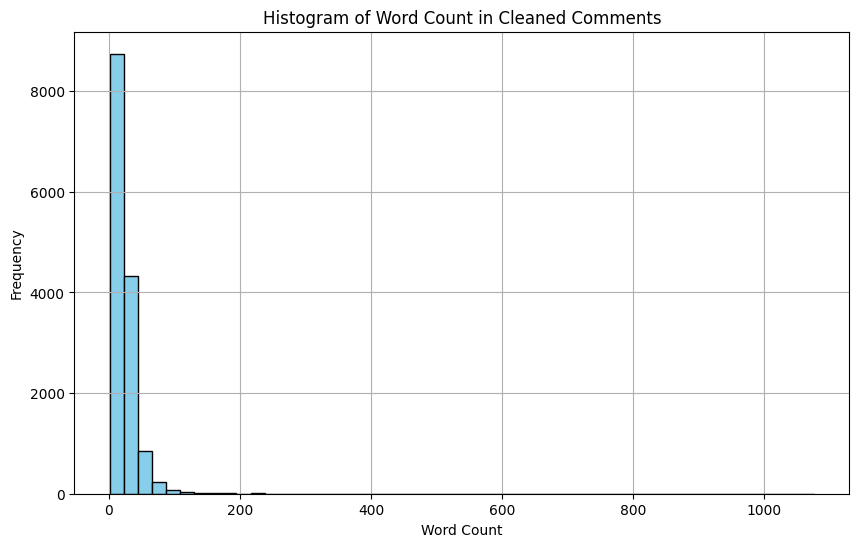

In [ ]:
# Đếm số từ trong mỗi comment
comments['word_count'] = comments['clean_cmt'].apply(lambda x: len(x.split()))
#in ra màn hình số từ trong comment
print('Word Count', comments['word_count'])
# Vẽ biểu đồ histogram
plt.figure(figsize=(10, 6))
plt.hist(comments['word_count'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Word Count in Cleaned Comments')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


> Tiếp theo nhóm thực hiện việc đếm số từ trong mỗi bình luận sau khi đã được xử lý, sau đó in ra màn hình số từ trong mỗi bình luận và vẽ biểu đồ histogram để hiển thị phân phối của số từ trong các bình luận đã được làm sạch.


> Có thể thấy rằng số từ trong mỗi bình luận sau khi xử lý rơi vào khoảng 0-100 từ cho mỗi bình luận là chiếm đa số







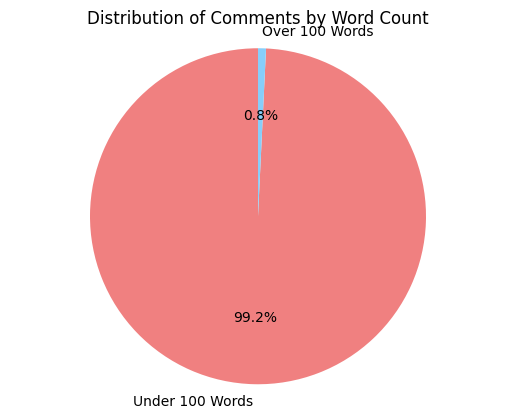

In [ ]:
# Tính số lượng bình luận dưới 100 từ và trên 100 từ
under_100_words = (comments['word_count'] < 100).sum()
over_100_words = (comments['word_count'] >= 100).sum()

# Tạo danh sách dữ liệu cho biểu đồ tròn
data = [under_100_words, over_100_words]
labels = ['Under 100 Words', 'Over 100 Words']

# Vẽ biểu đồ tròn
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.title('Distribution of Comments by Word Count')
plt.show()

Các đánh giá nằm trong khoảng từ 0 - 100 từ chiếm đến 99.2%, các đánh giá: trên 100 từ chỉ chiếm 0,8%.


Average Word Length: 3.772718711319241


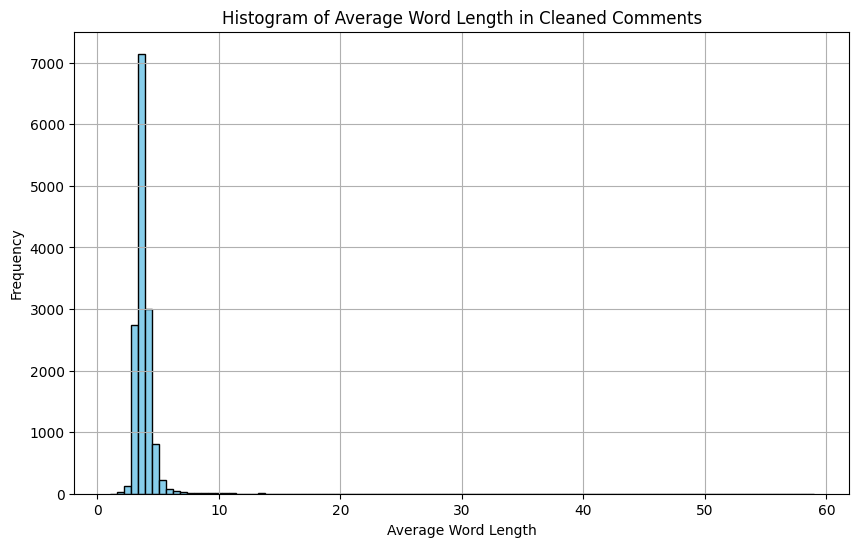

In [ ]:
# Tính độ dài trung bình của từng từ trong mỗi comment và lưu vào cột 'avg_word_length'
comments['avg_word_length'] = comments['clean_cmt'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))

# Tính giá trị trung bình của độ dài từ trong toàn bộ DataFrame
average_word_length = comments['avg_word_length'].mean()

# In giá trị trung bình
print("Average Word Length:", average_word_length)

# Vẽ biểu đồ histogram
plt.figure(figsize=(10, 6))
plt.hist(comments['avg_word_length'], bins=100, color='skyblue', edgecolor='black')
plt.title('Histogram of Average Word Length in Cleaned Comments')
plt.xlabel('Average Word Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


> Nhóm thực hiện tính độ dài trung bình của mỗi từ trong mỗi bình luận, lưu kết quả vào một cột mới có tên là 'avg_word_length'.


> Sau đó, tính giá trị trung bình của độ dài từ trên toàn bộ DataFrame, in giá trị trung bình ra màn hình và vẽ biểu đồ histogram để hiển thị phân phối của độ dài trung bình của từ trong các bình luận đã được làm sạch.


> Như kết quả trên, ta có thể thấy rằng độ dài trung bình từ của dữ liệu bình luận rơi vào khoảng 0-10 chiếm phần nhiều, với giá trị trung bình là 3.772718711319241


In [ ]:
from nltk import ngrams
from nltk.tokenize import word_tokenize
from collections import Counter

# Tải tài nguyên punkt
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True



> Tiếp đó sử dụng thư viện NLTK để thực hiện việc tải tài nguyên "punkt" để có thể sử dụng word tokenization. Tài nguyên "punkt" là một bộ dữ liệu được sử dụng trong việc phân tách văn bản thành các từ hoặc câu. Trong đó bao gồm:


*   Import phương thức ngrams từ thư viện nltk - sử dụng để tạo ra các n-grams từ một chuỗi văn bản.
*   Import phương thức word_tokenize từ thư viện nltk - dùng để tách một câu thành các từ riêng lẻ.
*   Import lớp Counter từ thư viện collections - sử dụng để đếm số lần xuất hiện của các phần tử trong một iterable.







In [ ]:
# Tokenize và tạo trigram cho mỗi comment
comments['clean_cmt_tokens'] = comments['clean_cmt'].apply(word_tokenize)
comments['trigrams'] = comments['clean_cmt_tokens'].apply(lambda x: list(ngrams(x, 3)))

# Tính tần suất của trigram
all_trigrams = [trigram for sublist in comments['trigrams'] for trigram in sublist]
trigram_freq = Counter(all_trigrams)

# Hiển thị tần suất của 10 trigram phổ biến nhất
print("Top 10 Trigrams:")
print(trigram_freq.most_common(10))

Top 10 Trigrams:
[(('giao', 'hàng', 'nhanh'), 1291), (('nha', 'mọi', 'người'), 659), (('với', 'giá', 'tiền'), 630), (('nên', 'mua', 'nha'), 515), (('mọi', 'người', 'nên'), 476), (('người', 'nên', 'mua'), 353), (('mang', 'tính_chất', 'nhận'), 298), (('tính_chất', 'nhận', 'xu'), 289), (('không', 'nên', 'mua'), 279), (('với', 'giá', 'này'), 260)]




> Tiếp theo nhóm thực hiện quá trình tokenize và tạo trigram cho mỗi bình luận trong DataFrame comments. Sau đó, nhóm tính tần suất xuất hiện của các trigram và hiển thị 10 trigram phổ biến nhất.


> Việc này giúp phân tích ngữ liệu của các trigram, tức là các cặp từ liên tiếp có độ dài ba, trong các bình luận đã được làm sạch. Các trigram phổ biến sẽ cung cấp thông tin về ngữ cảnh và các biểu hiện ngôn ngữ đặc biệt trong tập dữ liệu.





<Figure size 1200x600 with 0 Axes>

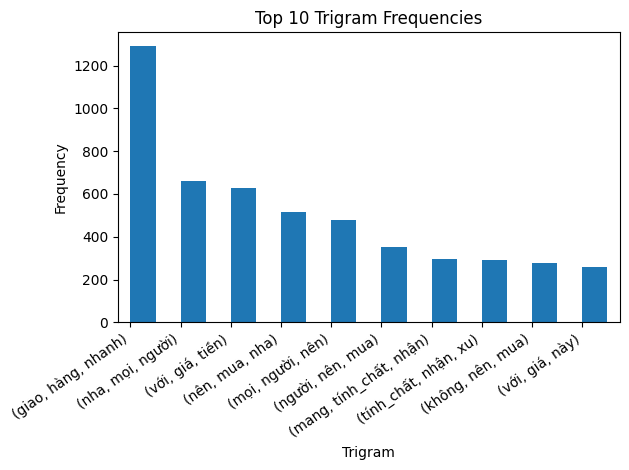

In [ ]:
# Vẽ biểu đồ histogram cho tần suất của trigram
plt.figure(figsize=(12, 6))

# Chuyển đổi dữ liệu Counter thành DataFrame để vẽ biểu đồ
df_trigram_freq = pd.DataFrame.from_dict(trigram_freq, orient='index', columns=['Frequency'])
df_trigram_freq = df_trigram_freq.sort_values(by='Frequency', ascending=False)[:10]

# Vẽ biểu đồ bar với align='edge'
df_trigram_freq.plot(kind='bar', legend=False, align='edge')

plt.title('Top 10 Trigram Frequencies')
plt.xlabel('Trigram')
plt.ylabel('Frequency')
plt.xticks(rotation=35, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()



> Nhóm thực hiện vẽ biểu đồ thể hiện tần suất xuất hiện của 10 triagram phổ biến nhất


> Chúng ta có thể thấy rằng, các từ xuất hiện nhiều nhất là cụm "giao hàng nhanh" với tần suất rơi vào khoảng 1300 lần, các cụm từ còn lại như "nên mua nha", "nha mọi người",... rơi vào tần suất xuất hiện từ 300-700 lần





In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

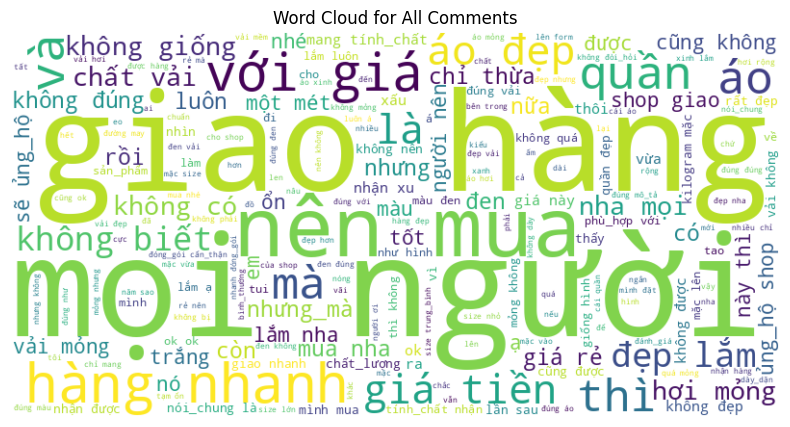

In [ ]:
# Kết hợp nội dung của tất cả các comments
all_comments = ' '.join(comments['clean_cmt'].tolist())

# Tạo Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

# Vẽ Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for All Comments')
plt.show()




> Nhóm tiến hành vẽ wordcloud để hiểu được sự phân bố của các bình luận


> Quan sát biểu đồ trên, giá trị 'giao hàng', "mọi người" có tần suất lặp lại nhiều nhất nên có kích thước lớn nhất với xanh lá trên biểu đồ. Tiếp theo đó là các giá trị như: 'nên mua', 'hàng nhanh',...


> Các giá trị có tần suất lặp lại càng ít thì màu sắc càng mờ và cỡ chữ càng nhỏ như: 'quá mỏng', 'chỉ thừa',..



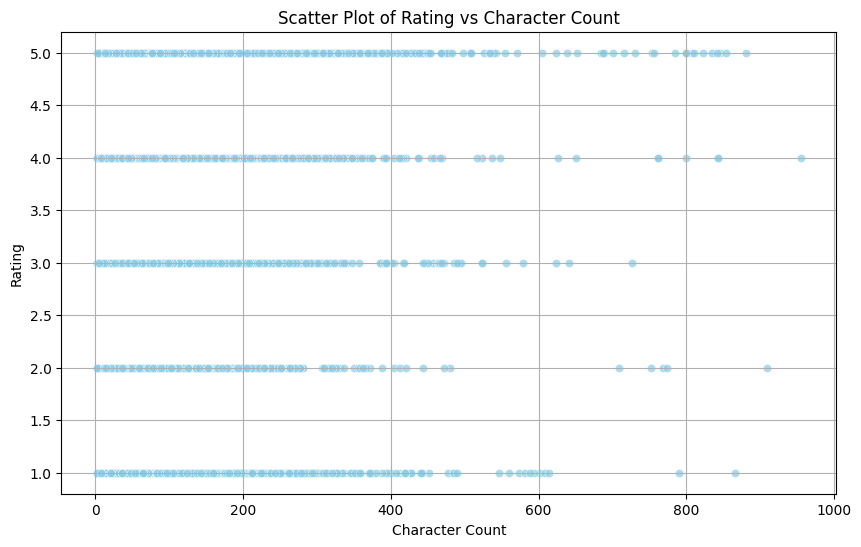

In [ ]:
# Giới hạn Character Count từ 0 đến 1000
filtered_comments = comments[(comments['char_count'] >= 0) & (comments['char_count'] <= 1000)]
# Tạo một DataFrame chứa rating và độ dài của bình luận
data = pd.DataFrame({'rating_star': comments['rating_star'], 'CharCount': filtered_comments['char_count']})

# Vẽ biểu đồ scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CharCount', y='rating_star', data=data, color='skyblue', alpha=0.7)
plt.title('Scatter Plot of Rating vs Character Count')
plt.xlabel('Character Count')
plt.ylabel('Rating')
plt.grid(True)
plt.show()



> Nhóm thực hiện vẽ biểu đồ thể hiện sự tương quan giữa rating với độ dài ngắn của bình luận, tuy nhiên vì các comment sẽ rơi vào độ dài từ 0-1000 là chủ yếu nên nhóm sẽ giới hạn để có thể trực quan dữ liệu rõ hơn


> Theo đó có thể thấy các bình luận càng dài sẽ có rating càng cao rơi vào 4-5 sao, các bình luận 1-3 sao có độ dài ít hơn



